## CAPSTONE PROJECT

---



#### IMPORT PACKAGES

In [1]:
# Import Library yang akan dibutuhkan dalam teks analitik
import pandas as pd
import nltk
nltk.download('omw-1.4')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from PIL import Image
import seaborn as sns
from nltk.util import ngrams
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\giryi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
# Download corpus nltk yang akan digunakan
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\giryi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\giryi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giryi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\giryi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

#### PROBLEM STATEMENT

Dari data resta_resto diketahui bahwa data berjumlah 1000 baris dengan 2 kolom yaitu kolom review yang menunjukan penilaian user terhadap restoran yang tedapat kritik maupu pujian dan kolom liked yang menunjukan ekspresi user tentang restoran tersebut yang ditampilkan dengan 2 label yaitu 1 dan 0. Dengaan melihat data ini permasalahan yang bisa diselesaikan adalah bagaimana memprediksi sentimen analysys user melalui review yang sudah dituliskan oleh customer terhadap restoran tersebut. Penyelesaian yang akan digunakan adalah klasifikasi teks data dengan supervised learning karena sudah ada label pada data yang sudah dikumpulkan.

#### READ DATASET & DATA PREPROCESSING

In [3]:
df = pd.read_csv('C:/Users/giryi/Senior DataScientist/resta_resto.tsv',sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
# Melihat infoormasi data, dari tipe data dan jumlah baris datanya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
# handle duplicate data 
df[df[['Review','Liked']].duplicated(keep=False)].sort_values('Review')

,Review,Liked
334,I love this place.,1
814,I love this place.,1
380,I won't be back.,0
843,I won't be back.,0
505,I would not recommend this place.,0
846,I would not recommend this place.,0
383,The food was terrible.,0
816,The food was terrible.,0


In [6]:
#Drop data yang terindikasi duplicate
df = df.drop_duplicates(subset=['Review','Liked']).reset_index()

In [7]:
# Cek kembali data duplicate sudah terhapus atau belum
df[df[['Review','Liked']].duplicated(keep=False)].sort_values('Review')

,index,Review,Liked


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   996 non-null    int64 
 1   Review  996 non-null    object
 2   Liked   996 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 23.5+ KB


#### DATA PRE-PROCESSING

In [8]:
# Proses data processing untuk menhapus berbagai tanda,angka,spasi,simbol, dll
import re
import string
def dataCleaning(content):
  # remove hashtag
  content = re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", content)
  #remove punctuation
  content = content.translate(str.maketrans("","",string.punctuation)) 
  content = re.sub("[\.\,\!\?\:\;\-\=]", " ", content)
  #remove number
  content = re.sub(r"\d+", "", content)
  #remove space
  content = content.strip()
  #remove \n
  content = re.sub('\s+',' ', content)
  #remove simbol
  content = re.sub(r'ðÿ', ' ', content)
  content = re.sub(r'ž', ' ', content)
  content = re.sub(r'œ', ' ', content)
  content = re.sub(r'²', ' ', content)
  content = re.sub(r'â', ' ', content)
  content = re.sub(r'ª', ' ', content)
  content = re.sub(r'ƒ', ' ', content)
  content = re.sub(r'ï', ' ', content)
  content = re.sub(r'¾', ' ', content)
  content = re.sub(r'¹', ' ', content) 
  content = re.sub(r'º', ' ', content)  
  content = re.sub(r'¼', ' ', content) 
  return content
df['dataCleaning'] = df['Review'].apply(dataCleaning)

df[['Review','dataCleaning']]

,Review,dataCleaning
0,Wow... Loved this place.,Wow Loved this place
1,Crust is not good.,Crust is not good
2,Not tasty and the texture was just nasty.,Not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...,The selection on the menu was great and so wer...
...,...,...
991,I think food should have flavor and texture an...,I think food should have flavor and texture an...
992,Appetite instantly gone.,Appetite instantly gone
993,Overall I was not impressed and would not go b...,Overall I was not impressed and would not go back
994,"The whole experience was underwhelming, and I ...",The whole experience was underwhelming and I t...


In [9]:
# Merubah huruf tidak kapital

df['hilangkan_kapital'] = df['dataCleaning'].apply(lambda x: x.lower())
df.head()

,index,Review,Liked,dataCleaning,hilangkan_kapital
0,0,Wow... Loved this place.,1,Wow Loved this place,wow loved this place
1,1,Crust is not good.,0,Crust is not good,crust is not good
2,2,Not tasty and the texture was just nasty.,0,Not tasty and the texture was just nasty,not tasty and the texture was just nasty
3,3,Stopped by during the late May bank holiday of...,1,Stopped by during the late May bank holiday of...,stopped by during the late may bank holiday of...
4,4,The selection on the menu was great and so wer...,1,The selection on the menu was great and so wer...,the selection on the menu was great and so wer...


In [10]:
# melihat data yang sudah di lowercase
for i in df["hilangkan_kapital"][:10]:
  print(i)

wow loved this place
crust is not good
not tasty and the texture was just nasty
stopped by during the late may bank holiday off rick steve recommendation and loved it
the selection on the menu was great and so were the prices
now i am getting angry and i want my damn pho
honeslty it didn t taste that fresh
the potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer
the fries were great too
a great touch


In [11]:
# mengtokenkan kata2 setalah di lower
df["Review_clean"] = df["hilangkan_kapital"].apply(lambda x: word_tokenize(x))

df.head()

,index,Review,Liked,dataCleaning,hilangkan_kapital,Review_clean
0,0,Wow... Loved this place.,1,Wow Loved this place,wow loved this place,"[wow, loved, this, place]"
1,1,Crust is not good.,0,Crust is not good,crust is not good,"[crust, is, not, good]"
2,2,Not tasty and the texture was just nasty.,0,Not tasty and the texture was just nasty,not tasty and the texture was just nasty,"[not, tasty, and, the, texture, was, just, nasty]"
3,3,Stopped by during the late May bank holiday of...,1,Stopped by during the late May bank holiday of...,stopped by during the late may bank holiday of...,"[stopped, by, during, the, late, may, bank, ho..."
4,4,The selection on the menu was great and so wer...,1,The selection on the menu was great and so wer...,the selection on the menu was great and so wer...,"[the, selection, on, the, menu, was, great, an..."


#### Lemmatization tidak dipakai karena KATA "WAS" MALAH BERUBAH JADI "WA" JADI TIDAK DIGUNAKAN PROSES LEMMATIZATION

In [16]:
# # Lemmatization (cancel)
# start_time = datetime.now()

# lemmatizer = WordNetLemmatizer()
# df["Review_clean"] = df["Review_clean"].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# end_time = datetime.now()
# print('Waktu yang diperlukan: {}'.format(end_time - start_time))

# df.head()

Waktu yang diperlukan: 0:00:01.348925


,index,Review,Liked,hilangkan_kapital,hilangkan_titik_koma,Review_clean
0,0,Wow... Loved this place.,1,wow... loved this place.,wow loved this place,"[wow, loved, this, place]"
1,1,Crust is not good.,0,crust is not good.,crust is not good,"[crust, is, not, good]"
2,2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty.,not tasty and the texture was just nasty,"[not, tasty, and, the, texture, wa, just, nasty]"
3,3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...,stopped by during the late may bank holiday of...,"[stopped, by, during, the, late, may, bank, ho..."
4,4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...,the selection on the menu was great and so wer...,"[the, selection, on, the, menu, wa, great, and..."


#### Stemming tidak dipakai karena KATA "WAS" MALAH BERUBAH JADI "WA" JADI TIDAK DIGUNAKAN PROSES STEMMING

In [15]:
# # Stemming (Cancel)
# start_time = datetime.now()

# ps = PorterStemmer()

# df["Review_clean"] = df["Review_clean"].apply(lambda x: [ps.stem(word) for word in x])

# end_time = datetime.now()
# print('Waktu yang diperlukan: {}'.format(end_time - start_time))

# df.head()

Waktu yang diperlukan: 0:00:00.185500


,index,Review,Liked,hilangkan_kapital,hilangkan_titik_koma,Review_clean
0,0,Wow... Loved this place.,1,wow... loved this place.,wow loved this place,"[wow, love, thi, place]"
1,1,Crust is not good.,0,crust is not good.,crust is not good,"[crust, is, not, good]"
2,2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty.,not tasty and the texture was just nasty,"[not, tasti, and, the, textur, wa, just, nasti]"
3,3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...,stopped by during the late may bank holiday of...,"[stop, by, dure, the, late, may, bank, holiday..."
4,4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...,the selection on the menu was great and so wer...,"[the, select, on, the, menu, wa, great, and, s..."


In [12]:
# stopwords (good) ini dpakai karena bias menghilangkan kata sesuai
start_time = datetime.now()

stop_words = set(stopwords.words('english'))

df["Review_clean"] = df["Review_clean"].apply(lambda x: [word for word in x if word not in stop_words])

end_time = datetime.now()
print('Waktu yang diperlukan: {}'.format(end_time - start_time))

df.head(20)

Waktu yang diperlukan: 0:00:00.007979


,index,Review,Liked,dataCleaning,hilangkan_kapital,Review_clean
0,0,Wow... Loved this place.,1,Wow Loved this place,wow loved this place,"[wow, loved, place]"
1,1,Crust is not good.,0,Crust is not good,crust is not good,"[crust, good]"
2,2,Not tasty and the texture was just nasty.,0,Not tasty and the texture was just nasty,not tasty and the texture was just nasty,"[tasty, texture, nasty]"
3,3,Stopped by during the late May bank holiday of...,1,Stopped by during the late May bank holiday of...,stopped by during the late may bank holiday of...,"[stopped, late, may, bank, holiday, rick, stev..."
4,4,The selection on the menu was great and so wer...,1,The selection on the menu was great and so wer...,the selection on the menu was great and so wer...,"[selection, menu, great, prices]"
5,5,Now I am getting angry and I want my damn pho.,0,Now I am getting angry and I want my damn pho,now i am getting angry and i want my damn pho,"[getting, angry, want, damn, pho]"
6,6,Honeslty it didn't taste THAT fresh.),0,Honeslty it didn t taste THAT fresh,honeslty it didn t taste that fresh,"[honeslty, taste, fresh]"
7,7,The potatoes were like rubber and you could te...,0,The potatoes were like rubber and you could te...,the potatoes were like rubber and you could te...,"[potatoes, like, rubber, could, tell, made, ah..."
8,8,The fries were great too.,1,The fries were great too,the fries were great too,"[fries, great]"
9,9,A great touch.,1,A great touch,a great touch,"[great, touch]"


In [13]:
#menggabungkan kata-kata menjadi kalimat yang utuh
df["Review_clean_V2"] = df["Review_clean"].apply(lambda x: " ".join(x)) #menggabungkan kembali kata-kata dengan menambahkan spasi diantara dua kata tersebut
df.head()

,index,Review,Liked,dataCleaning,hilangkan_kapital,Review_clean,Review_clean_V2
0,0,Wow... Loved this place.,1,Wow Loved this place,wow loved this place,"[wow, loved, place]",wow loved place
1,1,Crust is not good.,0,Crust is not good,crust is not good,"[crust, good]",crust good
2,2,Not tasty and the texture was just nasty.,0,Not tasty and the texture was just nasty,not tasty and the texture was just nasty,"[tasty, texture, nasty]",tasty texture nasty
3,3,Stopped by during the late May bank holiday of...,1,Stopped by during the late May bank holiday of...,stopped by during the late may bank holiday of...,"[stopped, late, may, bank, holiday, rick, stev...",stopped late may bank holiday rick steve recom...
4,4,The selection on the menu was great and so wer...,1,The selection on the menu was great and so wer...,the selection on the menu was great and so wer...,"[selection, menu, great, prices]",selection menu great prices


#### EDA

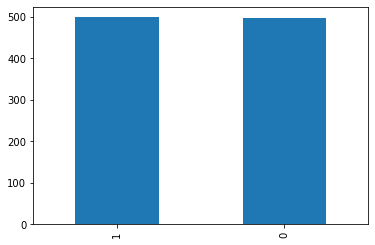

In [46]:
sentiment = df['Liked'].value_counts()
sentiment.plot(kind='bar')
plt.show()

In [16]:
kelas = df['Liked']
df3 = pd.concat([df['Review_clean'], kelas], axis=1)
df3
df3.groupby('Liked').size()

Liked
0    497
1    499
dtype: int64

Text(0.5, 1.0, 'Top 20 Kata pada Sentimen Negatif')

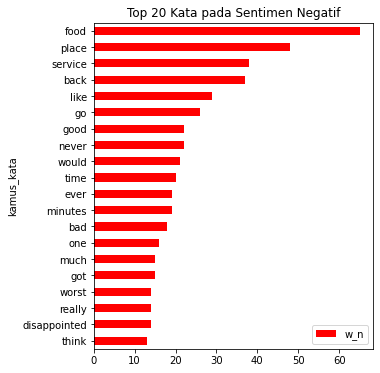

In [17]:
#Hitung Frequency Setiap Kata Berdasarkan Sentimen Positif, Lalu Masukan kedalam Kamus
kamus_kata_p = {}
for i, row in df3.iterrows():
    if(row['Liked']==0):
         for kata in row['Review_clean']:
                if (kata in kamus_kata_p):
                    kamus_kata_p[kata] += 1
                else:
                    kamus_kata_p[kata] = 1 

# Top 20 Kata Positif
from collections import Counter
w_n = Counter(kamus_kata_p)
top_100 = w_n.most_common(30)
top_100

#Bar Chart Sentimen positif
frek_p = pd.DataFrame(top_100, columns=['kamus_kata',
'w_n']).sort_values(by="w_n")
frek_p.tail(20).plot(x='kamus_kata', y='w_n', kind='barh', figsize=(5,6), color = 'r')
plt.title("Top 20 Kata pada Sentimen Negatif") 

In [18]:
huh = pd.DataFrame(top_100, columns=['kamus_kata','w']).sort_values(by="w", ascending=False).head(20)
huh

,kamus_kata,w
0,food,65
1,place,48
2,service,38
3,back,37
4,like,29
5,go,26
6,good,22
7,never,22
8,would,21
9,time,20


Text(0.5, 1.0, 'Top 20 Kata pada Sentimen Positif')

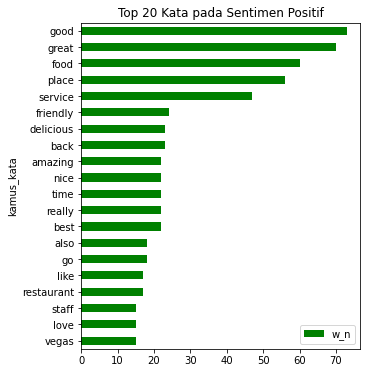

In [19]:
#Hitung Frequency Setiap Kata Berdasarkan Sentimen Positif, Lalu Masukan kedalam Kamus
kamus_kata_p = {}
for i, row in df3.iterrows():
    if(row['Liked']==1):
         for kata in row['Review_clean']:
                if (kata in kamus_kata_p):
                    kamus_kata_p[kata] += 1
                else:
                    kamus_kata_p[kata] = 1 

# Top 20 Kata Positif
from collections import Counter
w_n = Counter(kamus_kata_p)
top_100_n = w_n.most_common(30)
top_100_n

#Bar Chart Sentimen positif
frek_p = pd.DataFrame(top_100_n, columns=['kamus_kata',
'w_n']).sort_values(by="w_n")
frek_p.tail(20).plot(x='kamus_kata', y='w_n', kind='barh', figsize=(5,6), color = 'green')
plt.title("Top 20 Kata pada Sentimen Positif") 

In [20]:
hih = pd.DataFrame(top_100_n, columns=['kamus_kata','w_n']).sort_values(by="w_n", ascending=False).head(20)
hih

,kamus_kata,w_n
0,good,73
1,great,70
2,food,60
3,place,56
4,service,47
5,friendly,24
6,delicious,23
7,back,23
8,amazing,22
9,nice,22


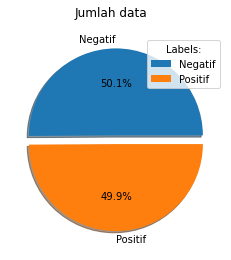

In [14]:
# Melihat jumlah data pebandingan
def your_autopct_format(prct_value):
  print(prct_value)
  return '{:.1f}%\n{:.0f}'.format(prct_value, )
import matplotlib.pyplot as plt
import numpy as np

# arraydata = np.array([Liked[0],Liked[1]])
sentiment = df['Liked'].value_counts()
mylabels = ["Negatif","Positif"]
myexplode = [0.1, 0]

plt.pie(sentiment, labels = mylabels, explode = myexplode, shadow = True, autopct='%2.1f%%')
plt.legend(title = "Labels:")
plt.suptitle("Jumlah data")
plt.show() 

In [15]:
# Memisahkan review positif dan review negatif
review_positif = df[df['Liked'] == 1]
review_negatif = df[df['Liked'] == 0]

C:\Users\giryi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\giryi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


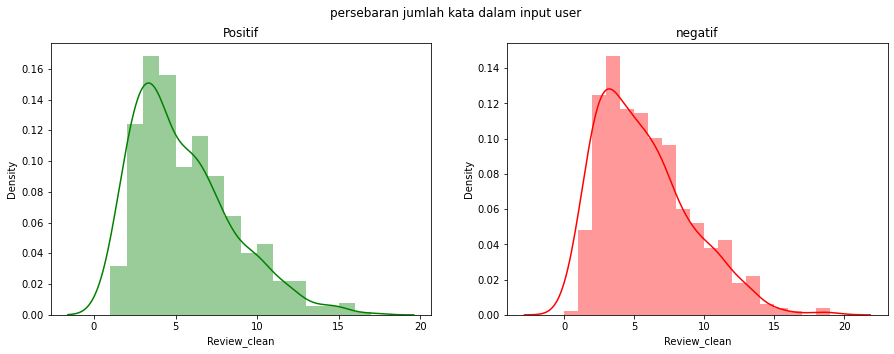

In [23]:
# memvisualisasikan banyaknya input kata yang digunakan saat mereview movie dari masing-masing label
jumlah_kata_positif = review_positif["Review_clean"].apply(lambda x: len(x))
jumlah_kata_negatif = review_negatif["Review_clean"].apply(lambda x: len(x))

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
sns.distplot(jumlah_kata_positif,ax=ax1,color='Green')
ax1.set_title("Positif")
sns.distplot(jumlah_kata_negatif,ax=ax2,color='Red')
ax2.set_title("negatif")
fig.suptitle("persebaran jumlah kata dalam input user")
plt.show() 

In [24]:
#filter berdasarkan review positif
positif = df[df['Liked'] == 1]
negatif = df[df['Liked'] == 0]

In [16]:
# Memvisualisasikan dengan wordlcoud
def display_word(data, color):
  plt.subplots(figsize=(15,15))
  word_cloud = WordCloud(width = 500, height = 300, background_color="white", contour_color=color,
                         max_words=2000, random_state=42, collocations=False)
  word_cloud.generate(' '.join(data))
  plt.imshow(word_cloud)
  plt.axis('off')
  plt.show()

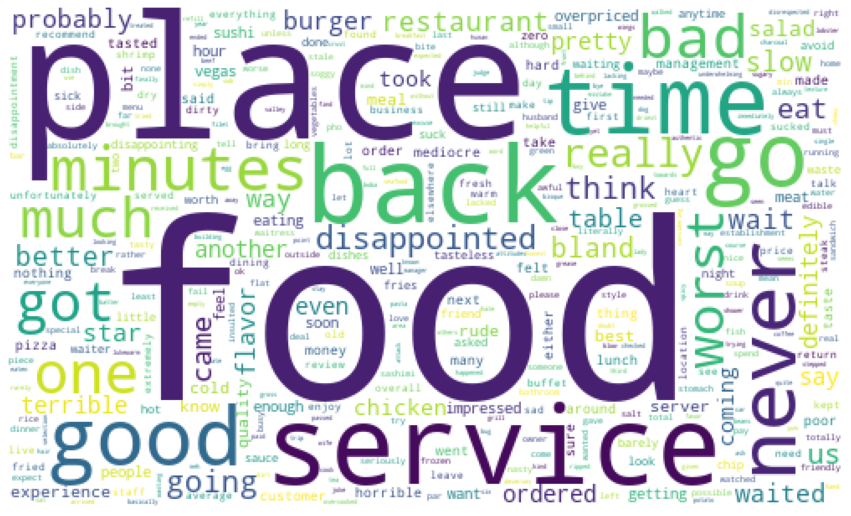

In [26]:
# wordcloud review negatif
display_word(negatif["Review_clean_V2"],'blue')

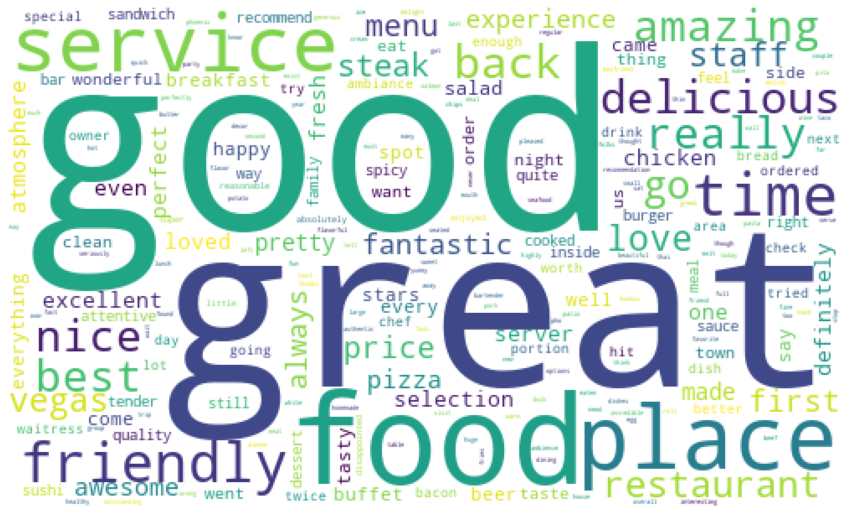

In [27]:
# wordcloud review negatif
display_word(positif["Review_clean_V2"],'blue')

#### FEATURE ENGINEERING

##### Pembobotan TF-IDF

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

# calc IDF
tfidf = TfidfVectorizer(norm=None, smooth_idf=True)
tfs = tfidf.fit_transform(df["Review_clean_V2"])
IDF_vector = tfidf.idf_

# calc TF vector
cvect = CountVectorizer()
TF_vector = cvect.fit_transform(df["Review_clean_V2"])

In [29]:
tfidf.idf_

array([7.21160359, 5.70752619, 7.21160359, ..., 7.21160359, 6.29531286,
       6.29531286])

In [30]:
IDF_vector

array([7.21160359, 5.70752619, 7.21160359, ..., 7.21160359, 6.29531286,
       6.29531286])

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer

#instantiate CountVectorizer() 
cv=CountVectorizer() 
# this steps generates word counts for the words in your docs 
word_count_vector=cv.fit_transform(df["Review_clean_V2"])

tfidf_transformer=TfidfTransformer(norm='l2', smooth_idf=True, use_idf=True, ) 
tfidf_transformer.fit(word_count_vector)

# print idf values 
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 
# sort ascending 
df_idf.sort_values(by=['idf_weights'])

C:\Users\giryi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,idf_weights
food,3.108960
place,3.279778
good,3.382962
service,3.450403
great,3.730364
...,...
law,7.211604
latte,7.211604
lastly,7.211604
las,7.211604


In [32]:
IDF_vector

array([7.21160359, 5.70752619, 7.21160359, ..., 7.21160359, 6.29531286,
       6.29531286])

In [33]:
# normalize TF vector
normalized_TF_vector = normalize(TF_vector, norm='l1', axis=1)
feature_names = tfidf.get_feature_names()

C:\Users\giryi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [34]:
tabel_tf = pd.DataFrame(np.transpose(normalized_TF_vector.A),index=feature_names)
tabel_tf

,0,1,2,3,4,5,6,7,8,9,...,986,987,988,989,990,991,992,993,994,995
absolute,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
absolutely,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
absolutley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
accident,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
accommodations,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yucky,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yukon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yummy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
tabel_idf = pd.DataFrame(np.transpose(IDF_vector),index=feature_names,columns=['IDF'])
tabel_idf

,IDF
absolute,7.211604
absolutely,5.707526
absolutley,7.211604
accident,7.211604
accommodations,7.211604
...,...
yucky,7.211604
yukon,7.211604
yum,7.211604
yummy,6.295313


In [36]:
# hitung TF x IDF sehingga dihasilkan TFIDF matrix / vector
tfidf_mat = normalized_TF_vector.multiply(IDF_vector).toarray()
tabel_tfidf = pd.DataFrame(np.transpose(tfidf_mat),index= feature_names)
tabel_tfidf

,0,1,2,3,4,5,6,7,8,9,...,986,987,988,989,990,991,992,993,994,995
absolute,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
absolutely,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
absolutley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
accident,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
accommodations,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yucky,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yukon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yummy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
tabel_gabungan = pd.concat([tabel_tf,tabel_idf,tabel_tfidf], axis=1)
tabel_gabungan

,0,1,2,3,4,5,6,7,8,9,...,986,987,988,989,990,991,992,993,994,995
absolute,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
absolutely,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
absolutley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
accident,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
accommodations,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yucky,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yukon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yummy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#Tranpose
data = pd.DataFrame(np.transpose(tabel_tfidf))
data['label'] = df['Liked']
data

,absolute,absolutely,absolutley,accident,accommodations,accomodate,accordingly,accountant,ache,acknowledged,...,yellow,yellowtail,yelpers,yet,yucky,yukon,yum,yummy,zero,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


#### MODELING

In [39]:
fitur = np.array(feature_names)
headers = list(data.columns.values)
X = data[headers[:-1]]
y = data[headers[-1:]].values.ravel()

In [40]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # 80% training and 20% test

##### SVM

In [40]:
# SVM

from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel': ['rbf', 'poly', 'linear'],
    'C': [0.5, 0.01, 0.1, 1, 10, 20, 40, 50, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(cv=5,
                           estimator=SVC(random_state=42),
                           param_grid=parameters,
                           n_jobs=-1,
                           verbose=1,
                           scoring='accuracy')

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.5, 0.01, 0.1, 1, 10, 20, 40, 50, 100],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear']},
             scoring='accuracy', verbose=1)

In [41]:
print(f'Best Score: {grid_search.best_score_}')

best_params = grid_search.best_estimator_.get_params()
print(f'Best Parameter:')
for param in parameters:
  print(f'\t{param}: {best_params[param]}')

Best Score: 0.7951965408805032
Best Parameter:
	kernel: rbf
	C: 10
	gamma: 0.01


In [42]:
from sklearn.metrics import classification_report
y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       106
           1       0.75      0.68      0.72        94

    accuracy                           0.74       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200



In [44]:
accuracySVM = grid_search.score(X_test, y_test)
print('Accuracy:', accuracySVM)


Accuracy: 0.745


##### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [42]:
accuracy = classifier.score(X_test, y_test)
print('Accuracy:', accuracy)


Accuracy: 0.76


In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
y_pred = classifier.predict(X_test)

In [45]:
# classification_report
print(classification_report(y_test, y_pred))
# we are getting almost 91% accuracy

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       106
           1       0.78      0.68      0.73        94

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



##### Linear SVC

In [18]:
x = df['Review']
y = df['Liked']

In [19]:
import spacy
nlp = spacy.load('en_core_web_sm')

import string
punct = string.punctuation
# punct

from spacy.lang.en.stop_words import STOP_WORDS
stopwords = list(STOP_WORDS) # list of stopwords

class CustomTokenizer():
    def __init__(self):
        pass

    def text_data_cleaning(self,sentence):
        doc = nlp(sentence)                         

        tokens = [] # list of tokens
        for token in doc:
            if token.lemma_ != "-PRON-":
                temp = token.lemma_.lower().strip()
            else:
              temp = token.lower_
            tokens.append(temp)

        cleaned_tokens = []
        for token in tokens:
            if token not in stopwords and token not in punct:
                cleaned_tokens.append(token)
        return cleaned_tokens

In [20]:
custom_tokenizer = CustomTokenizer()
custom_tokenizer.text_data_cleaning("Hello all, It's a beautiful day outside there!")
# stopwords and punctuations removed

['hello', 'beautiful', 'day', 'outside']

In [21]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [22]:
tfidf = TfidfVectorizer(tokenizer=custom_tokenizer.text_data_cleaning)
# Tokenizer secara custom

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = df.Liked, random_state = 0)

In [27]:
model_svc = LinearSVC()

In [28]:
pipeline = Pipeline([('tfidf',tfidf), ('clf',model_svc)])


In [29]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<bound method CustomTokenizer.text_data_cleaning of <__main__.CustomTokenizer object at 0x0000028A41EFC730>>)),
                ('clf', LinearSVC())])

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = pipeline.predict(x_test)

In [31]:
# classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.81      0.78       100
           1       0.80      0.74      0.77       100

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.78      0.78      0.77       200



In [32]:
accuracySVc = pipeline.score(x_test, y_test)
print('akurasi  = ', accuracySVc)

akurasi  =  0.775


#### EVALUATION

In [64]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
from imblearn.metrics import specificity_score


print('Accuracy SVM : ',accuracySVM)
print('Accuracy Logistic Regression:', accuracy)
print('Accuracy SVC : ', accuracySVc)
print('==================================')
print('The best akurasi : SVC Model')

Accuracy SVM :  0.745
Accuracy Logistic Regression: 0.76
Accuracy SVC :  0.775
The best akurasi : SVC Model


In [75]:
import joblib
joblib.dump(pipeline,'nlp_modelGiry.pkl')

['nlp_modelGiry.pkl']

### KESIMPULAN/SARAN

1. Terapkan dengan pelanggan akan disambut saat mereka memasuki restoran dan menjawab dengan penuh empati
2. Terapkan dengan pelanggan akan dibantu dalam mencari tempat duduk pada jam sibuk / jam makan 
3. Terapkan sebuah tema keunikan restoran tersendiri untuk menarik daya tarik customer dan terapkan promosi yang menjanjikan
4. Terapkan  standar yang tinggi dalam produksi makanan yang disajikan dan perhatikan kualitas bahan baku 
5. Terapkan buku rahasia masak yang menjadi pedoman koki dalam memasak sesuatau,agar makanan yang disajikan terasa pas dan tidak hambar
6. Terapkan  SOP pelayanan dan layanan yang baik dan selalu menjaga kerbersihan di tempat maupun pelayan restoran untuk tetap bersih 